In [162]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


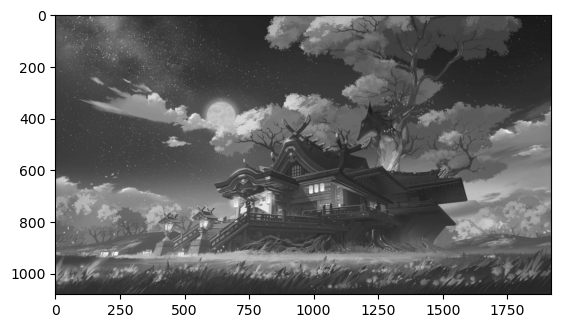

In [163]:
img= cv.imread('D:\imageprocessing\peakpx.jpg',0)
plt.imshow(img,cmap='gray')
def ve_do_thi(img,blur):
    fig, axs = plt.subplots(1, 2,figsize=(10,5))
    axs[0].imshow(img, cmap='gray')
    axs[0].set_title('ảnh cũ')
    axs[1].imshow(blur, cmap='gray')    
    axs[1].set_title('ảnh làm mờ')
    plt.show()


In [164]:
 #làm mờ trung bình
def mean_filter(kernel):
    temp=0
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            temp+=kernel[i,j]
    kernel_box=(1/temp)*kernel
    return kernel_box


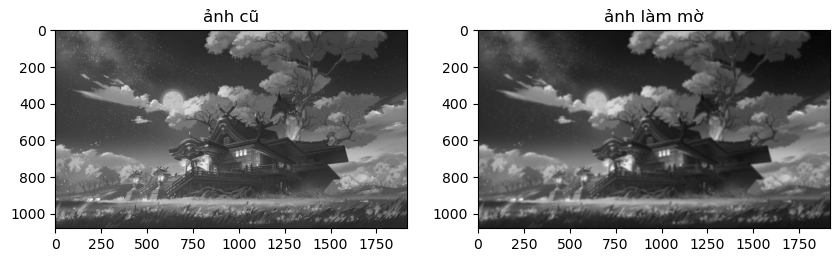

In [165]:
kernel=np.ones([10,10])
kernel_box=mean_filter(kernel)
box_blur=cv.filter2D(img,-1,kernel_box)
ve_do_thi(img,box_blur)

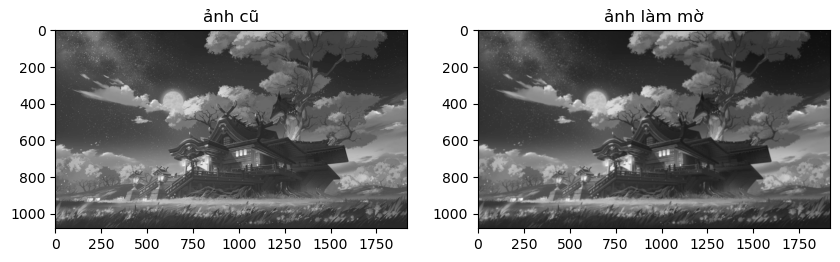

In [166]:
# làm mờ gaussian
k=cv.getGaussianKernel(9,sigma=1.5)
kernel_gauss=k*k.T
gauss_blur=cv.filter2D(img,-1,kernel_gauss)
ve_do_thi(img,gauss_blur)

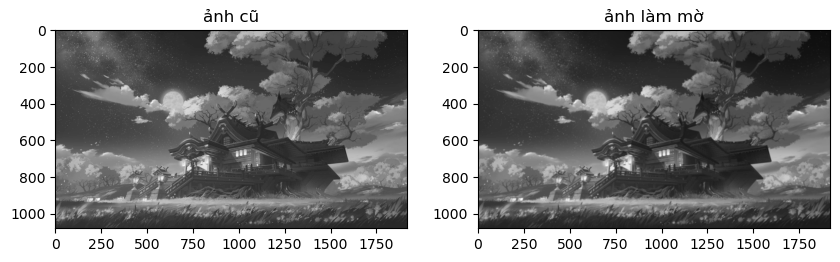

In [167]:
Gauss_blur_CV=cv.GaussianBlur(img,(5,5),9)
ve_do_thi(img,Gauss_blur_CV)

In [168]:
# làm mờ trung vị
img2=cv.imread('D:/imageprocessing/anh_nhieu.jpg',0)

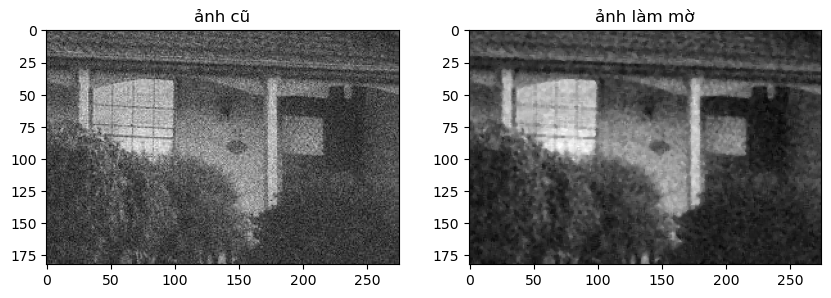

In [169]:

median_blur=cv.medianBlur(img2,3)
ve_do_thi(img2,median_blur)

In [170]:
robert_x=np.array([[-1,0],[0,1]])
robert_y=np.rot90(robert_x)
print(robert_x)
print(robert_y)



[[-1  0]
 [ 0  1]]
[[ 0  1]
 [-1  0]]


In [171]:
def printplot(img,xy,x,y):
    fig, axs = plt.subplots(2, 2,figsize=(20,15))
    axs[0,0].imshow(img,cmap='gray')
    axs[0,0].set_title('img')
    axs[1,0].imshow(x, cmap='gray')
    axs[1,0].set_title('I*Hx')

    axs[1,1].imshow(y, cmap='gray')    
    axs[1,1].set_title('I*Hy')
    axs[0,1].imshow(xy,cmap='gray')
    axs[0,1].set_title('|I*HX|+|I*Hy|')
    plt.show()

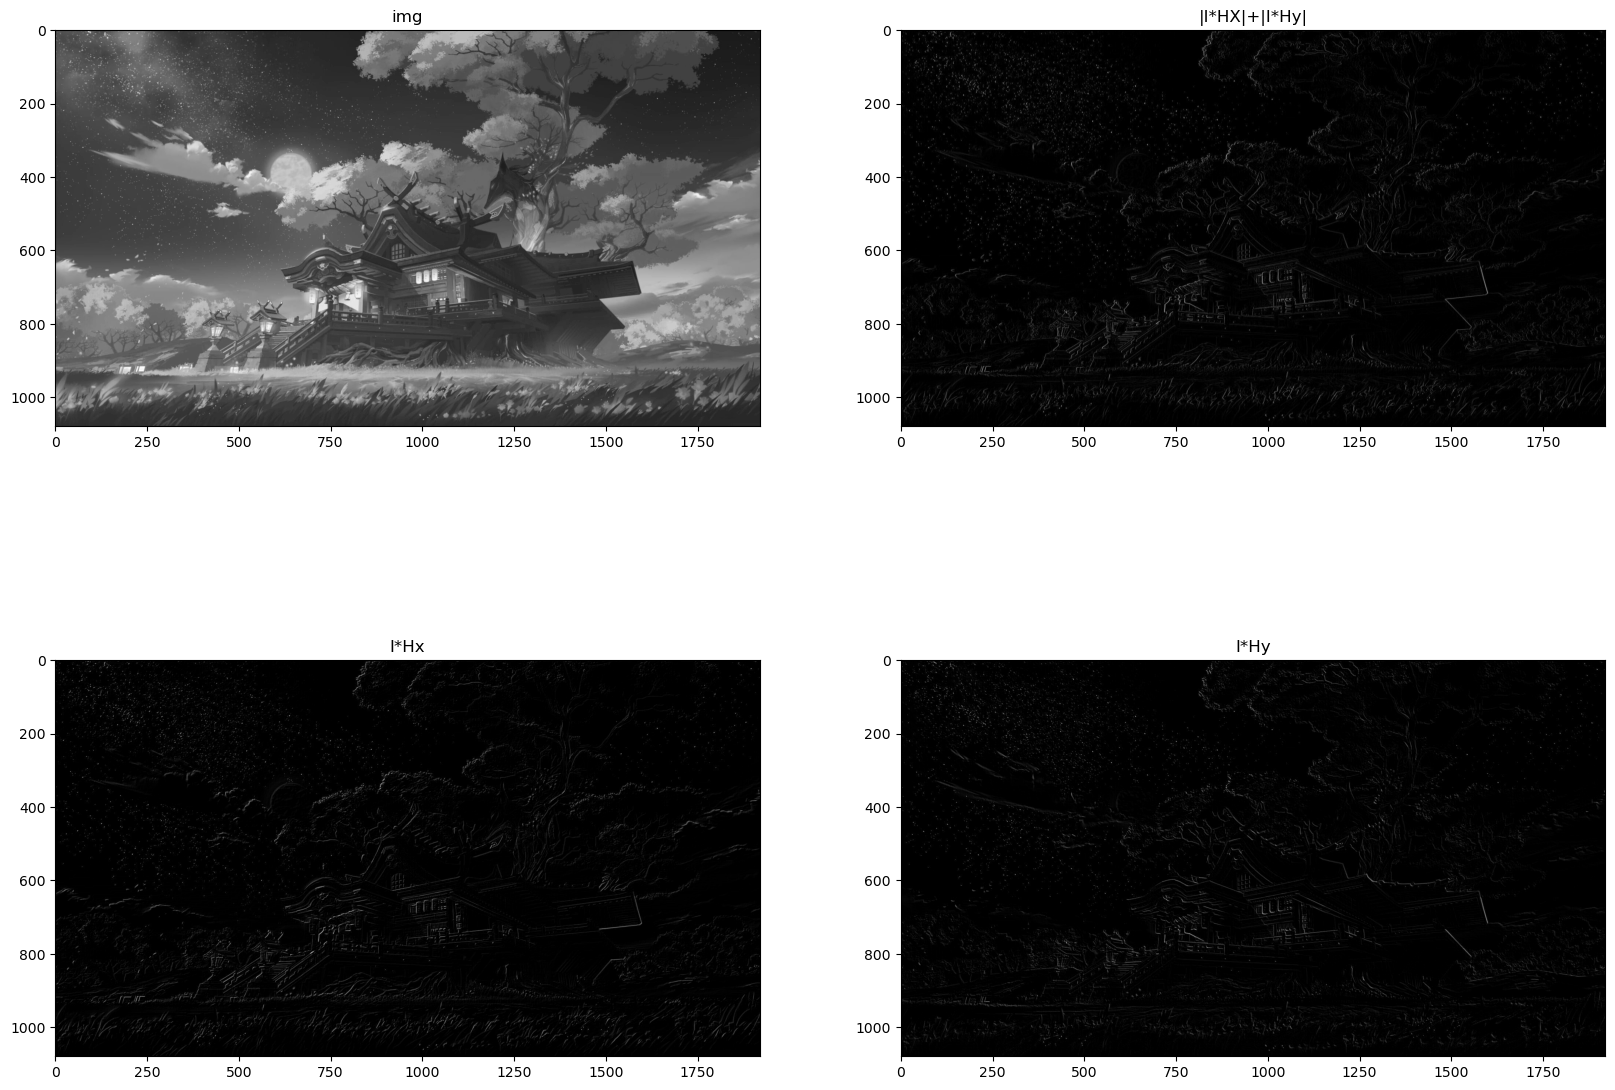

In [172]:
#toán tử robert 
img_robert_x=cv.filter2D(img,-1,robert_x)
img_robert_y=cv.filter2D(img,-1,robert_y)
img_robert_xy=img_robert_x+img_robert_y
printplot(img,img_robert_xy,img_robert_x,img_robert_y)

In [173]:
#toán tử prewitt
prewitt_x=np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
prewitt_y=np.rot90(prewitt_x)
print(prewitt_x)
print(prewitt_y)

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [174]:
img_prewitt_x=cv.filter2D(img,-1,prewitt_x)
img_prewitt_y=cv.filter2D(img,-1,prewitt_y)
img_prewitt_xy=img_prewitt_x+img_prewitt_y

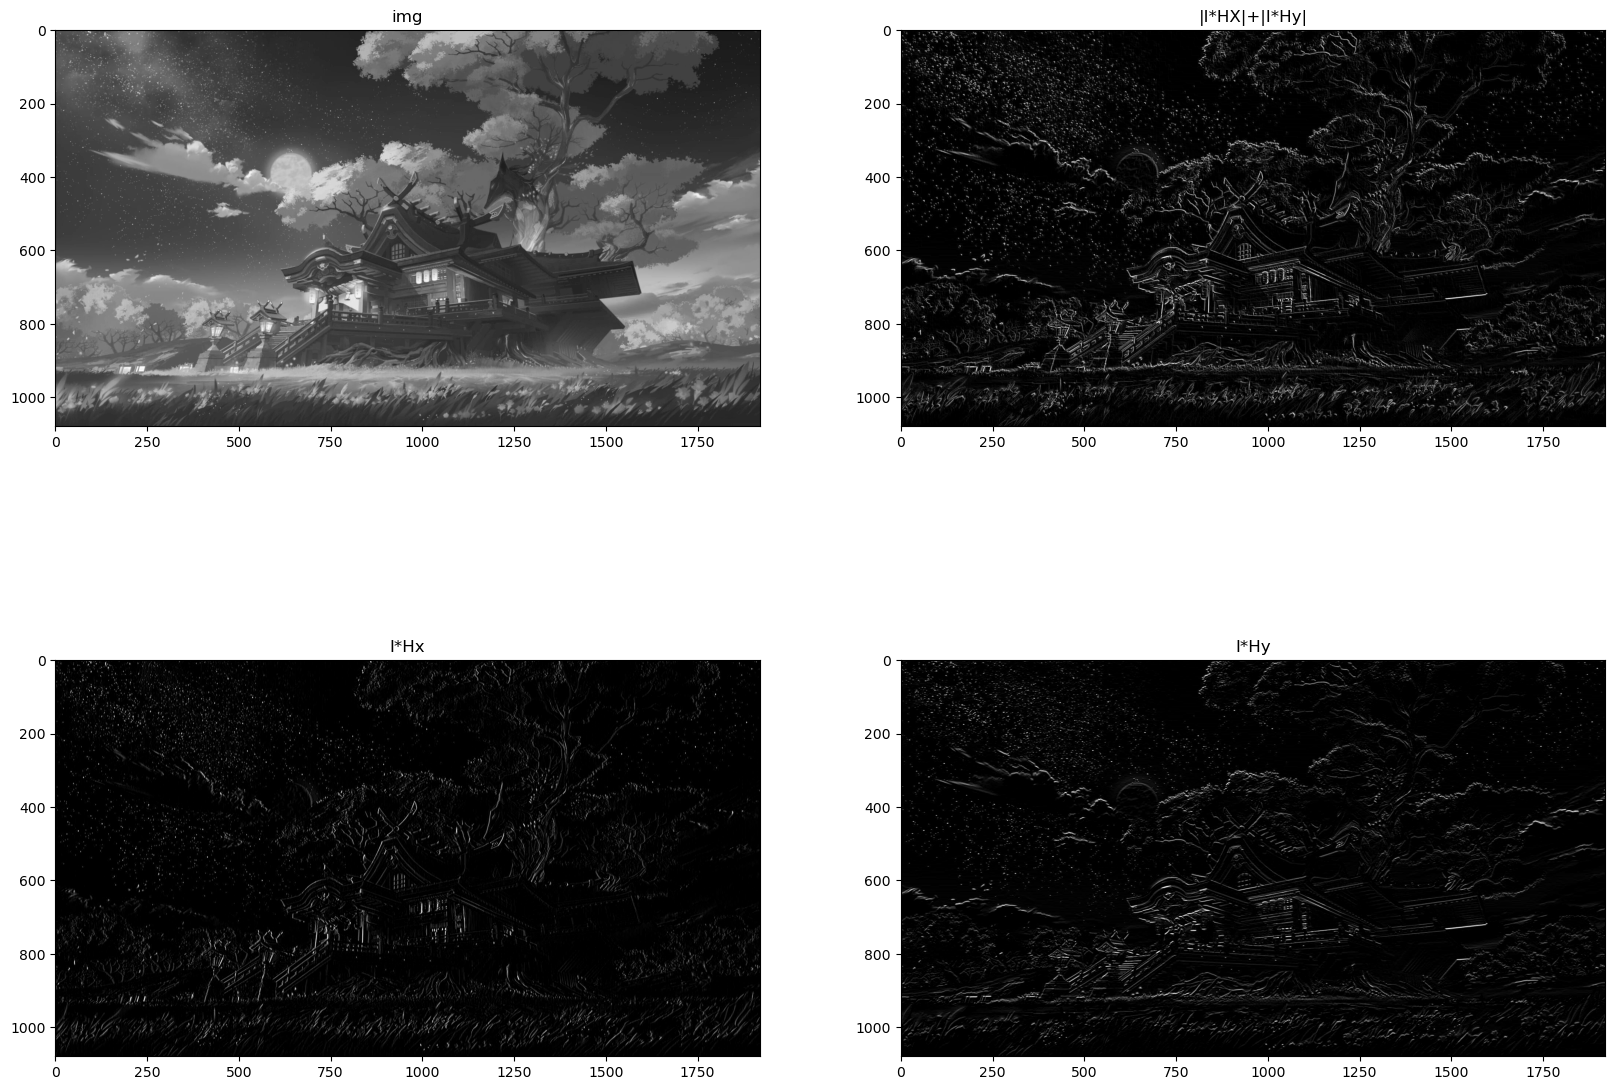

In [175]:
printplot(img,img_prewitt_xy,img_prewitt_x,img_prewitt_y)

In [176]:
#  toán tử solbel
solbel_x=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
solbel_y=np.rot90(solbel_x)
print(solbel_x)
print(solbel_y)


[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [177]:
img_solbel_x=cv.filter2D(img,-1,solbel_x)
img_solbel_y=cv.filter2D(img,-1,solbel_y)
img_solbel_xy=img_prewitt_x+img_solbel_y

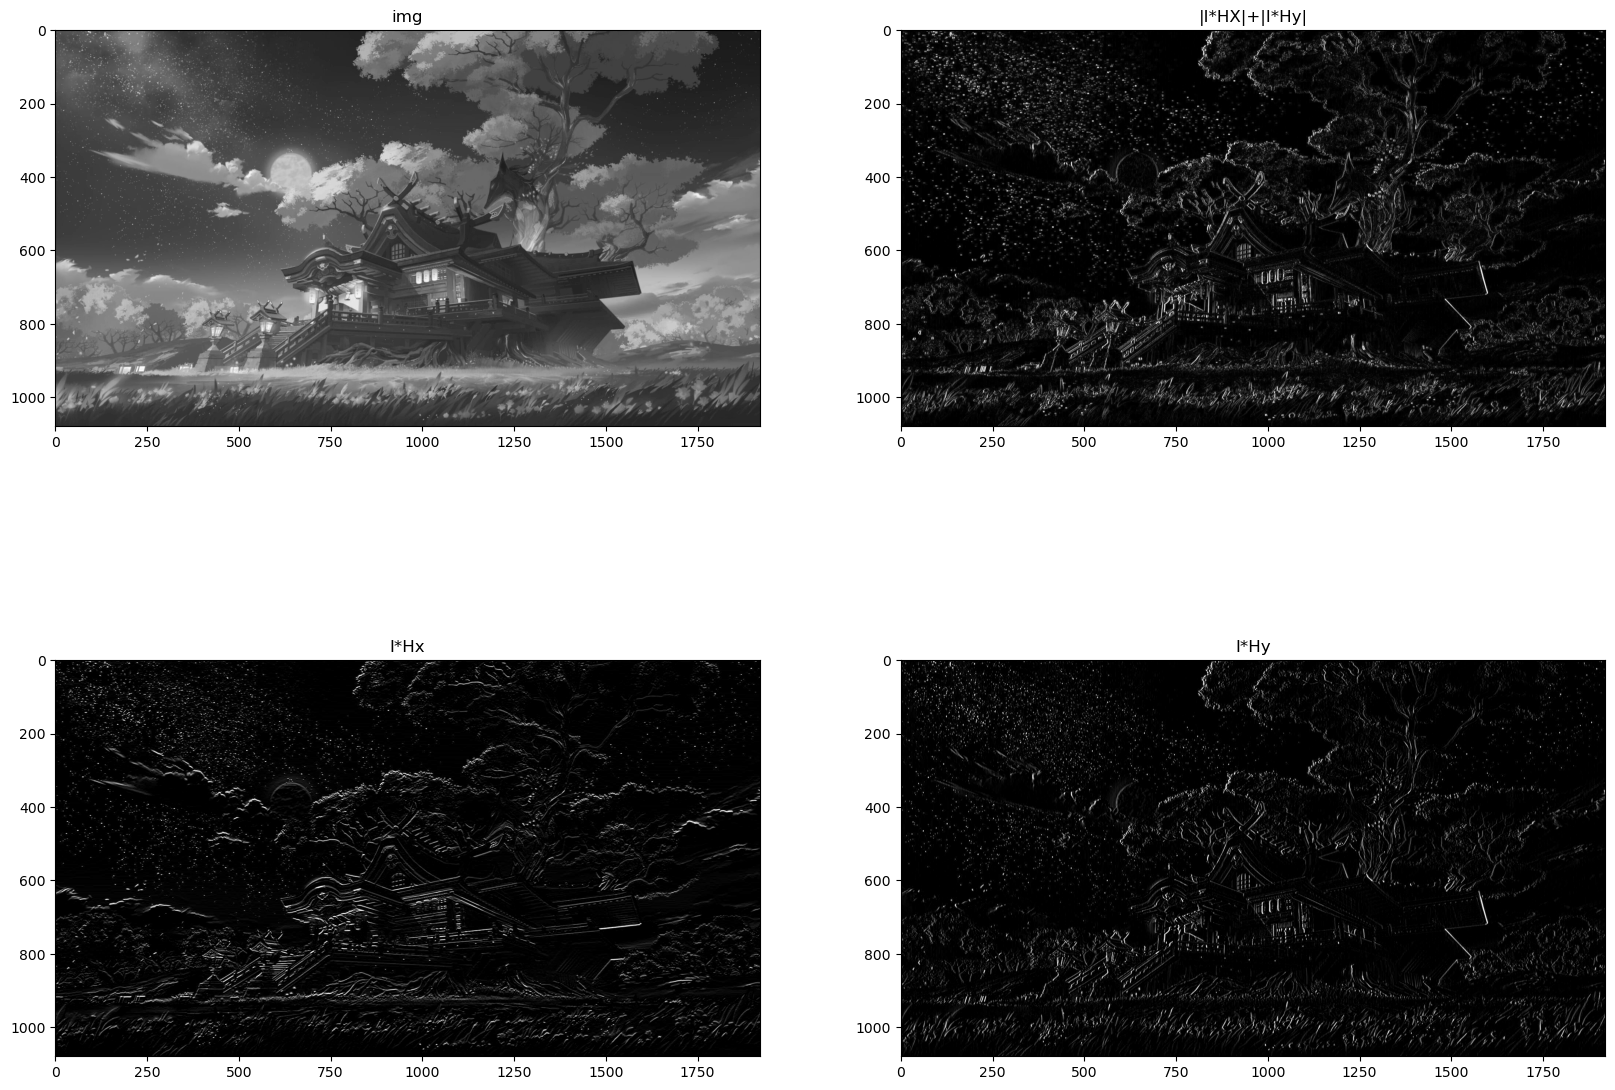

In [178]:
printplot(img,img_solbel_xy,img_solbel_x,img_solbel_y)

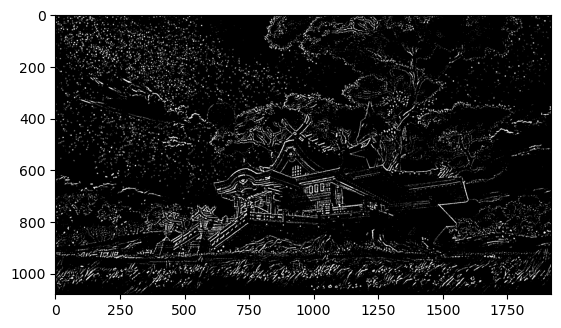

In [179]:
#laplace of gaussian
grauss_blur=cv.GaussianBlur(img,(5,5),5)
kernels=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
edges=cv.filter2D(grauss_blur,-1,kernels)
img_threshold = edges > 3
plt.imshow(img_threshold,cmap='gray')

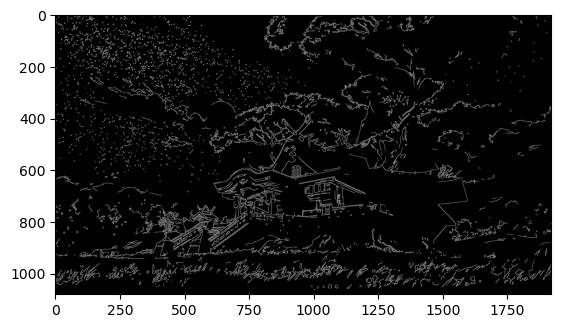

In [182]:
#canny edges
edges=cv.Canny(img,100,200)
plt.imshow(edges,cmap='gray')

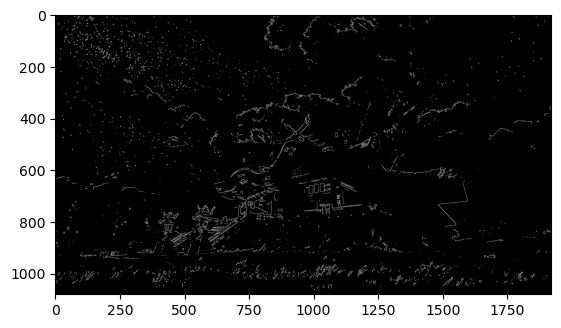

In [183]:
edges=cv.Canny(img,220,230)
plt.imshow(edges,cmap='gray')